In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import IBMQ
import qiskit
import random
import pandas as pd
import numpy as np 
from qiskit.providers.ibmq import IBMQJob
from qiskit.providers.ibmq.job import job_monitor







In [3]:
IBMQ.save_account('e16aff0cd0c88a64f3123ca8f2417390e7c73433dbc8b7d872ff853bd6045d642d2230ed0b26ee080c6947f2c924fa031339b76ecd79c0b96eb9b6c08184230d')

configrc.store_credentials:WARNING:2020-11-10 09:24:54,172: Credentials already present. Set overwrite=True to overwrite.


In [4]:
IBMQ.load_account()
IBMQ.providers()
provider = IBMQ.get_provider()
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [5]:
api = 'e16aff0cd0c88a64f3123ca8f2417390e7c73433dbc8b7d872ff853bd6045d642d2230ed0b26ee080c6947f2c924fa031339b76ecd79c0b96eb9b6c08184230d'

In [2]:
import numpy as np


def Pauli(j):
    if j == 0:
        return np.array([[1, 0], [0, 1]])
    elif j == 1:
        return np.array([[0, 1], [1, 0]])
    elif j == 2:
        return np.array([[0, -1j], [1j, 0]])
    elif j == 3:
        return np.array([[1, 0], [0, -1]])




In [3]:
def trace(A):
    tr = 0
    for i in range(len(A)):
        tr+= A[i][i] 
    return(tr)



In [4]:
def normTr(d, A):
    ev = np.linalg.eigvalsh(A)
    Ntr = 0
    for j in range(0, d):
        Ntr += abs(ev[j]) #calculate the sum of all absolute values 
    return Ntr

In [5]:
def negativity(d, rhoTp):
    En = 0.5*(normTr(d, rhoTp) - 1.0)
    return En





In [6]:
#maximizing a  bell state:
#This cell makes measurements in x,y,and z bases 


#variation_A_Hadamard_and_CNOT

#n is number of qubits
n = 2
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
qc = []

for i in range(3**n):
    qc.append(QuantumCircuit(q, c))
    qc[i].id(0)
    qc[i].id(1)
    qc[i].barrier(0,1)
    qc[i].h(0)
    qc[i].barrier(0,1)
    qc[i].id(0)
    qc[i].id(1)
    qc[i].barrier(0,1)
    qc[i].cx(0,1)
    qc[i].barrier(0,1)
    qc[i].id(0)
    qc[i].id(1)
    qc[i].barrier(0,1)
    
    


count = 0 #count refers to the total number of circuits.
for i in range(3):
    for j in range(3):
        if i == 0: 
            qc[count].h(0)
        elif i == 1:
            qc[count].s(0).inverse()
            qc[count].h(0)
        if j == 0:
            qc[count].h(1)
        elif j == 1:
            qc[count].s(1).inverse()
            qc[count].h(1)
        count += 1
        
for i in range(3**n):
    qc[i].measure(q,c)

  



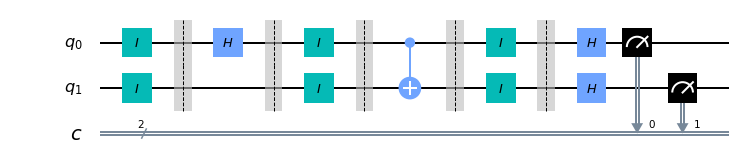

In [7]:
qc[0].draw(output = 'mpl')

In [8]:
qc

In [9]:
path = '/Users/student/Documents/summer_research/circuit_results/project1_files/ET/'

In [195]:
backend = provider.get_backend('ibmq_valencia')
output = []
n = 15 # total number of circuits for each number of identity gates. 
for i in range(n):
    job_exp = qiskit.execute(qc,backend=backend,shots = 8132)
    print(i)
    job_monitor(job_exp)
    output = job_exp.result().get_counts()
    df = pd.DataFrame(output)
    df.to_csv(path  + "var_A_H&C" + str(i)+ ".csv") ##variation_A_Hadamard_and_CNOT


    










0
Job Status: job has successfully run
1
Job Status: job has successfully run
2
Job Status: job has successfully run
3
Job Status: job has successfully run
4
Job Status: job has successfully run
5
Job Status: job has successfully run
6
Job Status: job has successfully run
7
Job Status: job has successfully run                        
8
Job Status: job has successfully run                     
9
Job Status: job has successfully run
10
Job Status: job has successfully run
11
Job Status: job has successfully run
12
Job Status: job has successfully run
13
Job Status: job has successfully run
14
Job Status: job has successfully run


#Automation planning:
1) Place id_gates in 5 positions of the circuit
2) write a code that does this in a single run. 


In [10]:
#sorts the output based on tuples

def sort_output(data):
    sorted_output = []
    for i in range(len(data)):
        sorted_output.append(sorted(data[i].items()))
    return(sorted_output)




In [11]:
#takes the probabilities from the sorted_output and gives an array in sorted order.
def probability(sorted_output):
    ns = 8132
    values = []
    for i in range(len(sorted_output)):
        for j in range(4):
            values.append(sorted_output[i][j][1]/ns)
    p = np.array(values)
    p
    return(p)
    

In [12]:
#density operator reconstruction begins here. 
#Outputs probability coefficient using probability from IBM Q as input

def prob_coeff(p):
    d1 = np.eye(4)
    ab = [1, -1]
    A = []
    for i in range(1,4):
        for j in range(1,4):
            for a in ab :
                for b in ab :
                    B = []
                    for al in range(4):
                        for be in range(4):
                            mat = (d1[al][0] + a* d1[al][i]) * (d1[be][0] + b* d1[be][j])/4
                            #mat = (int(d0[al]) + a* int(d1[i][al])) * (int(d0[be]) + b*int(d1[j][be]))/4 
                            B.append(mat)
                    A.append(B) #We append our matrix here because we need 16 different elements of c_s so that we don't need to reshape
    M = np.array(A, dtype = float)
    M_inv = np.linalg.pinv(M)
    C = np.matmul(M_inv, p)
    return(C)


#This is the rho equation which takes the prob coefficients (C) as its input
def rho_eq(C):
    B = []
    d = 0
    for al in range(4):
        for be in range(4):
            rho_q2 = C[d] * np.kron(Pauli(al),Pauli(be))/4
            d = d + 1
            B.append(rho_q2)
    
    
    return(B)

rho = np.zeros((4,4))
for i in range(len(B)):
    rho = rho + B[i]
rho

#We combine these two parts to create the function below. 




In [13]:
#This is the rho equation which takes the prob coefficients (C) as its input and returns the reconstructed density operator
def rho_eq(C):
    B = []
    d = 0
    rho = np.zeros((4,4))
    for al in range(4):
        for be in range(4):
            rho_q2 = C[d] * np.kron(Pauli(al),Pauli(be))/4
            d = d + 1
            B.append(rho_q2)
        
    for i in range(len(B)):
        rho = rho + B[i]
    return(rho)







In [14]:
#takes the reconstructed density operator as its input and changes the list with negative eigenvalues to positive.
def pos_eigval_creater(den_op):
    a = 0
    eigval = np.linalg.eigvalsh(den_op)
    meu = sorted(eigval, reverse = True)
    lmd = np.zeros(len(meu))
    count = 0
    for i in reversed(range(len(meu))) :
        if (meu[i].real + a/(i+1)) < 0:
            lmd[i] = 0
            a += lmd[i] + meu[i]
            lmd[i-1] = meu[i-1].real + a
            count = count + 1

        else:
            lmd[i] = meu[i].real + a/(count+1)
    return(lmd)
        

In [15]:
#This function takes our reconstructed density operator and updates it with new eigenvalues 
def rho_updated_meu(den_op,lmd): #lmd is the new eigenvalue which is the output of  pos_eigval_creater(rho)
    n = 2
    matrix = np.zeros((2**n,2**n))
    eigval, eigvecs = np.linalg.eig(den_op)
    for i in range(len(lmd)):
        matrix = matrix + lmd[i]* np.outer(eigvecs[:,i] , eigvecs[:,i])
    return(matrix)



In [16]:
def matrix_to_list(rho):
    rho_list = []
    for i in range(len(rho)):
        for j in range(len(rho[0])):
            rho_list.append(rho[i][j])
    return(rho_list)



In [17]:
def partial_transpose(rho_lst, q):#This function computes the partial transpose of a matrix. 
    z = np.array([1,0])
    o = np.array([0,1])
    lst = [z,o]
    M = np.zeros((4,4))
    dd = 0
    for i in lst:
        for j in lst:
            for i1 in lst:
                for j1 in lst:
                    if q == 0:
                        M = M + rho_lst[dd] * np.kron(np.outer(i1,i),np.outer(j,j1))
                    elif q == 1:
                        M = M + rho_lst[dd] * np.kron(np.outer(i,i1),np.outer(j1,j))
                    dd = dd + 1
    return(M)               
                

In [18]:
#How do I incorporate new eigenvalues to the density operator 

In [19]:
def csv_to_dict(filename, PATH):  
    outcome = []
    output = []
    import csv
    with open(PATH + filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            row = row[1:5]
            outcome.append(row)

    for i in range(1,len(outcome)):
        for j in range(len(outcome[0])):
            if outcome[i][j] == '':
                outcome[i][j] = 0
            else:    
                outcome[i][j] = int(float(outcome[i][j]))
        output.append(dict(zip(outcome[0], outcome[i])))
    return output       
        

In [20]:
path1 =  '/Users/student/Documents/summer_research/circuit_results/project1_files/ET/' 

In [21]:
x = []
for i in range(15):
    raw_data = csv_to_dict("var_A_H&C" + str(i)+ ".csv", path1)
    x.append(raw_data)
    
x

[[{'01': 218, '11': 3804, '00': 3840, '10': 270},
  {'01': 2128, '11': 1996, '00': 2137, '10': 1871},
  {'01': 1999, '11': 2117, '00': 1983, '10': 2033},
  {'01': 1883, '11': 1991, '00': 2156, '10': 2102},
  {'01': 3835, '11': 67, '00': 421, '10': 3809},
  {'01': 1962, '11': 1909, '00': 2045, '10': 2216},
  {'01': 2049, '11': 1946, '00': 1973, '10': 2164},
  {'01': 2224, '11': 1856, '00': 2060, '10': 1992},
  {'01': 170, '11': 3829, '00': 3877, '10': 256}],
 [{'01': 241, '11': 3848, '00': 3813, '10': 230},
  {'01': 2076, '11': 1989, '00': 2143, '10': 1924},
  {'01': 2001, '11': 2076, '00': 2048, '10': 2007},
  {'01': 1813, '11': 2002, '00': 2186, '10': 2131},
  {'01': 3766, '11': 66, '00': 413, '10': 3887},
  {'01': 1889, '11': 1882, '00': 2181, '10': 2180},
  {'01': 1936, '11': 2007, '00': 2101, '10': 2088},
  {'01': 2157, '11': 1836, '00': 2053, '10': 2086},
  {'01': 239, '11': 3760, '00': 3875, '10': 258}],
 [{'01': 220, '11': 3958, '00': 3714, '10': 240},
  {'01': 2100, '11': 2144,

In [22]:
#define your path1 and q.
def ET_for_all(path):
    ET_list = []
    for i in range(0,15):
        q = 1
        raw_data = csv_to_dict("var_A_H&C" + str(i)+ ".csv", path)

        p = probability(sort_output(raw_data))

        Coeff = prob_coeff(p)

        den_op = rho_eq(Coeff)

        lmd = pos_eigval_creater(den_op)
        rho_with_meu = rho_updated_meu(den_op,lmd)

        rho_lst = matrix_to_list(rho_with_meu)

        rhoTp = partial_transpose(rho_lst, q)

        ET_list.append(negativity(4, rhoTp))

    return ET_list




In [23]:
out = ET_for_all(path1)
out


[0.4138027021386971,
 0.4118910691730322,
 0.410232804529744,
 0.41139053374551127,
 0.41152762158763445,
 0.4125003224695767,
 0.4098761225127465,
 0.4151385422665155,
 0.41779525007081353,
 0.38537801991324794,
 0.3929576517098865,
 0.39212718416649295,
 0.38974778821693346,
 0.38860985595878117,
 0.39817580398371355]

In [25]:
df = pd.DataFrame(ET_for_all(path1))
df.to_csv(path1 +  "ET_var_A.csv")

In [27]:
[min(out),max(out),np.mean(out)]

[0.38537801991324794, 0.41779525007081353, 0.4040767514962218]

In [28]:
#order ET(id gates in all), var_B(1H,CNOT), var_C(id on first2), var_D(id on first and last), 
#var_E(2nd and 3rd), var_G(2nd only), var_H(3rd only)
output = [[0.38537801991324794, 0.41779525007081353, 0.4040767514962218],
         [0.3895806356520859, 0.42645967686528474, 0.4169927177669487],
         [0.38537801991324794, 0.41779525007081353, 0.4040767514962218],
          [0.4014299023456158, 0.42077439052851373, 0.4127041568847389],
          [0.40081447720485586, 0.4216686478251114, 0.41091873584542343],
          [0.4044517134756368, 0.4230355154286348, 0.4148161193078571],
          [0.40113310423408755, 0.42498004499371866, 0.417362520268801]]